Pixel size:
0.78125 mas
0.00078125 arcsec
2.1701e-07 deg

Shape of model image: (128, 128) pixels


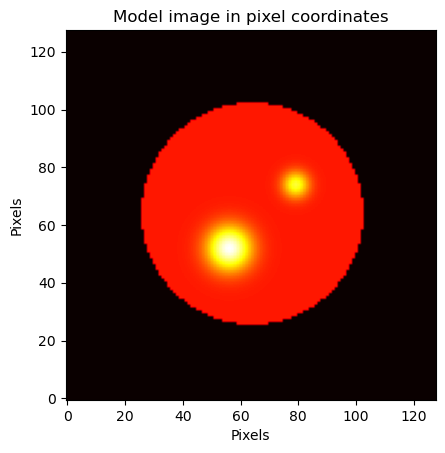

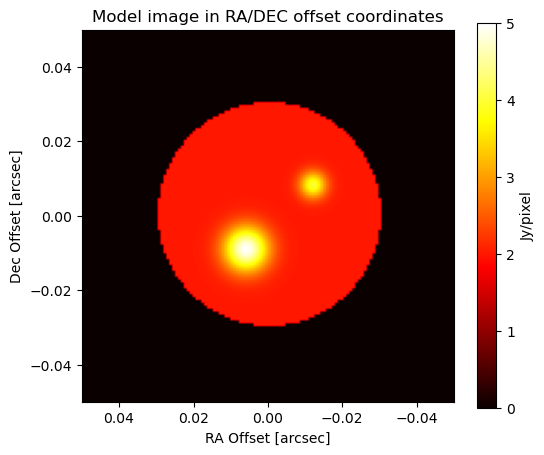

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
# Model image parameters
###################
fov_mas = 100  # field of view in milliarcseconds
npix = 128     # number of pixels per side
###################
 
### Setting up model image
###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###
# Image parameters
pixel_scale_mas = fov_mas / npix  # mas/pixel
pixel_scale_arcsec = pixel_scale_mas / 1000 # convert mas to arcseconds
pixel_scale_deg = pixel_scale_mas / 3.6e6  # convert mas to degrees
print('Pixel size:')
print(pixel_scale_mas, 'mas')
print(pixel_scale_arcsec, 'arcsec')
print(f'{pixel_scale_deg:.4e}', 'deg\n')
 
# Coordinate grid
x = np.arange(npix) - npix // 2
y = np.arange(npix) - npix // 2
xx, yy = np.meshgrid(x, y)
rr = np.sqrt(xx**2 + yy**2) * pixel_scale_mas  # radius in mas
 
# Uniform disk: 30 mas radius, 2 Jy intensity
disk_radius_mas = 30
disk_intensity = 2.0  # Jy/pixel (arbitrary unit per pixel?)
model_image = np.zeros((npix, npix))
model_image[rr <= disk_radius_mas] = disk_intensity
 
# Hotspot 1
fwhm1_mas = 6.0
sigma1_pix = fwhm1_mas / (2.355 * pixel_scale_mas)
#peak1 = 0  # Jy above disk
peak1 = 2  # Jy above disk
x1, y1 = 15, 10  # in pixels from center (RA offset left, Dec offset up)
gauss1 = peak1 * np.exp(-((xx - x1)**2 + (yy - y1)**2) / (2 * sigma1_pix**2))
model_image += gauss1
 
# Hotspot 2
fwhm2_mas = 10.0
sigma2_pix = fwhm2_mas / (2.355 * pixel_scale_mas)
#peak2 = 0  # Jy above disk
peak2 = 3  # Jy above disk
x2, y2 = -8, -12  # in pixels from center (RA offset left, Dec offset up)
gauss2 = peak2 * np.exp(-((xx - x2)**2 + (yy - y2)**2) / (2 * sigma2_pix**2))
model_image += gauss2
 
print(f'Shape of model image: {model_image.shape} pixels')
###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###
 
### Plotting model image
###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###
plt.imshow(model_image, origin='lower', cmap='hot')
plt.title('Model image in pixel coordinates')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()
 
# Plotting in RA DEC offset coordinates
fig, ax = plt.subplots(figsize=(6, 5))
# Define extent in arcseconds for imshow
fov_arcsec = fov_mas / 1000  # convert to arcsec
extent = [-fov_arcsec/2, fov_arcsec/2, -fov_arcsec/2, fov_arcsec/2]  # [RA_min, RA_max, Dec_min, Dec_max]
# Alternatively, keep extents in mas itself
# extent = [-fov_mas/2, fov_mas/2, -fov_mas/2, fov_mas/2]  # [RA_min, RA_max, Dec_min, Dec_max]
im = ax.imshow(np.fliplr(model_image), origin='lower', extent=extent, cmap='hot')
ax.set_xlabel('RA Offset [arcsec]')
ax.set_ylabel('Dec Offset [arcsec]')
ax.invert_xaxis()  # Make RA increase to the left
cb = plt.colorbar(im, ax=ax)
cb.set_label('Jy/pixel')
plt.title('Model image in RA/DEC offset coordinates')
#plt.grid(True, color='white', ls='dotted')
plt.show()
###~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~###
 